In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Построение высокодивидендного портфеля с применением классической стратегии "Dogs of the Dow" на панъевропейской фондовой бирже Euronext

## 1. Анализ дивидендной доходности был проведен на основе данных терминала Refinitiv Eikon

__Результаты:__

In [8]:
df = pd.read_excel('companies.xlsx')
df

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AGEAS,AGEAS,AGEAS,AGEAS,UNIBAIL-RODAMCO-WE,UNIBAIL-RODAMCO-WE,UNIBAIL-RODAMCO-WE,UNIBAIL-RODAMCO-WE,UNIBAIL-RODAMCO-WE,UNIBAIL-RODAMCO-WE,UNIBAIL-RODAMCO-WE,UNIBAIL-RODAMCO-WE,UNIBAIL-RODAMCO-WE,UNIBAIL-RODAMCO-WE,UNIBAIL-RODAMCO-WE,KERING,KERING,KERING
1,UNIBAIL-RODAMCO-WE,UNIBAIL-RODAMCO-WE,UNIBAIL-RODAMCO-WE,UNIBAIL-RODAMCO-WE,GECINA,GECINA,GECINA,GECINA,GECINA,GECINA,GECINA,GECINA,GECINA,KERING,KERING,UNIBAIL-RODAMCO-WE,LVMH,LVMH
2,GECINA,SOCIETE GENERALE,SOCIETE GENERALE,GECINA,KERING,KERING,KERING,KERING,KERING,KERING,KERING,KERING,KERING,GECINA,LVMH,GECINA,GECINA,KBC
3,SOCIETE GENERALE,GECINA,GECINA,RENAULT,SOLVAY,SOLVAY,SOLVAY,SOLVAY,SOLVAY,LVMH,LVMH,LVMH,LVMH,LVMH,GECINA,LVMH,L'OREAL,ASML HOLDING
4,KERING,KERING,KBC,KBC,ARCELORMITTAL SA,GBL,GBL,SANOFI,LVMH,SOLVAY,SOLVAY,AB INBEV,AB INBEV,SOLVAY,L'OREAL,L'OREAL,SOLVAY,GECINA
5,SOLVAY,BNP PARIBAS,RENAULT,KERING,GBL,SANOFI,SANOFI,LVMH,SANOFI,SANOFI,AB INBEV,SOLVAY,L'OREAL,AB INBEV,SOLVAY,SOLVAY,YARA INTERNATIONAL,RANDSTAD NV
6,BNP PARIBAS,KBC,BNP PARIBAS,BNP PARIBAS,TOTALENERGIES,TOTALENERGIES,TOTALENERGIES,GBL,GBL,GBL,SANOFI,L'OREAL,SOLVAY,L'OREAL,ADP,GBL,RANDSTAD NV,L'OREAL
7,KBC,SOLVAY,KERING,SOLVAY,SANOFI,BNP PARIBAS,LVMH,REMY COINTREAU,TOTALENERGIES,L'OREAL,GBL,VIVENDI SE,RENAULT,RENAULT,RENAULT,SANOFI,SANOFI,AMUNDI
8,RENAULT,RENAULT,SOLVAY,ARCELORMITTAL,AKZO NOBEL,LVMH,BNP PARIBAS,TOTALENERGIES,REMY COINTREAU,TOTALENERGIES,L'OREAL,SANOFI,SANOFI,ADP,KBC,PERNOD RICARD,EIFFAGE,SOLVAY
9,GBL,GBL,GBL,GBL,SCHNEIDER ELECTRIC,VINCI,L'OREAL,L'OREAL,L'OREAL,AB INBEV,TOTALENERGIES,GBL,GBL,SANOFI,RANDSTAD NV,SODEXO,AMUNDI,BNP PARIBAS ACT.A


## 2. Сбор данных по доходности портфеля и индекса Euronext-100 по годам

In [9]:
p_10 = pd.DataFrame(columns = ['Portfolio', 'Market'])

year = []
for i in range(18):
    year.append(2005 + i)

lst_10 = []
lst_7 = []
lst_5 = []
lst_3 = []
lst_1 = []
market = []

### Портфель на 2005 год
_По данным за 2004_

Акции:
 - AGEAS
 - UNIBAIL-RODAMCO-WE
 - GECINA
 - SOCIETE GENERALE
 - KERING
 - SOLVAY
 - BNP PARIBAS
 - KBC
 - RENAULT
 - GBL

In [10]:
# 10 акций
tickers_list = ['AGS.BR', 
                'URW.AS', 
                'GFC.PA',
                'GLE.PA', 
                'KER.PA', 
                'SOLB.BR',
                'BNP.PA',
                'KBC.BR',  
                'RNO.PA', 
                'GBLB.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2005-01-01','2006-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2005-01-01',end='2006-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2005-01-01',end='2006-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2005-01-01','2006-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-10-ad8bfbad5661>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.4424408117213835
Growth of Market Index: 0.19947000899008002


In [11]:
# 7 акций
tickers_list = ['AGS.BR', 
                'URW.AS', 
                'GFC.PA',
                'GLE.PA', 
                'KER.PA', 
                'SOLB.BR',
                'BNP.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2005-01-01','2006-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2005-01-01',end='2006-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2005-01-01',end='2006-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2005-01-01','2006-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-11-c5c361896fc9>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.49171226445353333
Growth of Market Index: 0.19947000899008002


In [12]:
# 5 акций
tickers_list = ['AGS.BR', 
                'URW.AS', 
                'GFC.PA',
                'GLE.PA', 
                'KER.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2005-01-01','2006-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2005-01-01',end='2006-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2005-01-01',end='2006-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2005-01-01','2006-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-12-fbd1733eb6ee>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.536841630806315
Growth of Market Index: 0.19947000899008002


In [13]:
# 3 акции
tickers_list = ['AGS.BR', 
                'URW.AS', 
                'GFC.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2005-01-01','2006-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2005-01-01',end='2006-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2005-01-01',end='2006-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2005-01-01','2006-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-13-eefa95eb58fb>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.6221409896087421
Growth of Market Index: 0.19947000899008002


In [14]:
# 1 акция
tickers_list = ['AGS.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2005-01-01','2006-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2005-01-01',end='2006-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2005-01-01',end='2006-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2005-01-01','2006-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-14-83ef0ae8f89e>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.595016929908124
Growth of Market Index: 0.19947000899008002


### Портфель на 2006 год
_По данным за 2005_

Акции:
- AGEAS
- UNIBAIL-RODAMCO-WE
- SOCIETE GENERALE
- GECINA
- KERING
- BNP PARIBAS
- KBC
- SOLVAY
- RENAULT
- GBL

In [15]:
# 10 акций
tickers_list = ['AGS.BR', 
                'URW.AS', 
                'GLE.PA',
                'GFC.PA', 
                'KER.PA', 
                'BNP.PA',
                'KBC.BR',
                'SOLB.BR',
                'RNO.PA', 
                'GBLB.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2006-01-01','2007-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2006-01-01',end='2007-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2006-01-01',end='2007-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2006-01-01','2007-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-15-4a2b131ff74f>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.335943499332813
Growth of Market Index: 0.13663092268356408


In [16]:
# 7 акций
tickers_list = ['AGS.BR', 
                'URW.AS', 
                'GLE.PA',
                'GFC.PA', 
                'KER.PA', 
                'BNP.PA',
                'KBC.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2006-01-01','2007-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2006-01-01',end='2007-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2006-01-01',end='2007-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2006-01-01','2007-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-16-1f0ee56ec427>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.3840368733236364
Growth of Market Index: 0.13663092268356408


In [17]:
# 5 акций
tickers_list = ['AGS.BR', 
                'URW.AS', 
                'GLE.PA',
                'GFC.PA', 
                'KER.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2006-01-01','2007-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2006-01-01',end='2007-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2006-01-01',end='2007-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2006-01-01','2007-01-01', interval='1mo')['Adj Close']

data['N-100'] = dt['^N100'].to_list()
    
portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-17-e63f9a7bedd4>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.4097533165007535
Growth of Market Index: 0.13663092268356408


In [18]:
# 3 акции
tickers_list = ['AGS.BR', 
                'URW.AS', 
                'GLE.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2006-01-01','2007-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2006-01-01',end='2007-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2006-01-01',end='2007-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2006-01-01','2007-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-18-38343677e539>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.39196966046596543
Growth of Market Index: 0.13663092268356408


In [19]:
# 1 акция
tickers_list = ['AGS.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2006-01-01','2007-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2006-01-01',end='2007-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2006-01-01',end='2007-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2006-01-01','2007-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-19-8c6734051aec>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.2841703728862829
Growth of Market Index: 0.13663092268356408


### Портфель на 2007 год
_По данным за 2006_

Акции:
- AGEAS
- UNIBAIL-RODAMCO-WE
- SOCIETE GENERALE
- GECINA
- KBC
- RENAULT
- BNP PARIBAS
- KERING
- SOLVAY
- GBL

In [20]:
# 10 акций
tickers_list = ['AGS.BR', 
                'URW.AS', 
                'GLE.PA',
                'GFC.PA', 
                'KBC.BR',
                'RNO.PA', 
                'BNP.PA',
                'KER.PA',
                'SOLB.BR',
                'GBLB.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2007-01-01','2008-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2007-01-01',end='2008-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2007-01-01',end='2008-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2007-01-01','2008-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-20-11fd24ecbe85>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.04650527249240161
Growth of Market Index: 0.021471588059834262


In [21]:
# 7 акций
tickers_list = ['AGS.BR', 
                'URW.AS', 
                'GLE.PA',
                'GFC.PA', 
                'KBC.BR',
                'RNO.PA', 
                'BNP.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2007-01-01','2008-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2007-01-01',end='2008-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2007-01-01',end='2008-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2007-01-01','2008-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-21-2e48493a9634>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.06423767682383587
Growth of Market Index: 0.021471588059834262


In [22]:
# 5 акций
tickers_list = ['AGS.BR', 
                'URW.AS', 
                'GLE.PA',
                'GFC.PA', 
                'KBC.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2007-01-01','2008-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2007-01-01',end='2008-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2007-01-01',end='2008-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2007-01-01','2008-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-22-3ba671c1b83c>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.10389829944625258
Growth of Market Index: 0.021471588059834262


In [23]:
# 3 акции
tickers_list = ['AGS.BR', 
                'URW.AS', 
                'GLE.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2007-01-01','2008-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2007-01-01',end='2008-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2007-01-01',end='2008-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2007-01-01','2008-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-23-ac8d3be1f114>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.15844824048961237
Growth of Market Index: 0.021471588059834262


In [24]:
# 1 акция
tickers_list = ['AGS.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2007-01-01','2008-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2007-01-01',end='2008-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2007-01-01',end='2008-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2007-01-01','2008-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-24-f8cb5af3dd77>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.18502876649958677
Growth of Market Index: 0.021471588059834262


### Портфель на 2008 год
_По данным за 2007_

Акции:
- AGEAS
- UNIBAIL-RODAMCO-WE
- GECINA
- RENAULT
- KBC
- KERING
- BNP PARIBAS
- SOLVAY
- ARCELORMITTAL SA
- GBL

In [25]:
# 10 акций
tickers_list = ['AGS.BR', 
                'URW.AS', 
                'GFC.PA',
                'RNO.PA',
                'KBC.BR',
                'KER.PA',
                'BNP.PA',
                'SOLB.BR',
                'MT.AS',
                'GBLB.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2008-01-01','2009-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2008-01-01',end='2009-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2008-01-01',end='2009-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2008-01-01','2009-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-25-63e10b44b26c>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.43904481819633523
Growth of Market Index: -0.3696484535293455


In [26]:
# 7 акций
tickers_list = ['AGS.BR', 
                'URW.AS', 
                'GFC.PA',
                'RNO.PA',
                'KBC.BR',
                'KER.PA',
                'BNP.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2008-01-01','2009-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2008-01-01',end='2009-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2008-01-01',end='2009-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2008-01-01','2009-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-26-b03475de2f83>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.465697909755634
Growth of Market Index: -0.3696484535293455


In [27]:
# 5 акций
tickers_list = ['AGS.BR', 
                'URW.AS', 
                'GFC.PA',
                'RNO.PA',
                'KBC.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2008-01-01','2009-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2008-01-01',end='2009-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2008-01-01',end='2009-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2008-01-01','2009-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-27-e710910bed9d>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.49289113563117454
Growth of Market Index: -0.3696484535293455


In [28]:
# 3 акции
tickers_list = ['AGS.BR', 
                'URW.AS', 
                'GFC.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2008-01-01','2009-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2008-01-01',end='2009-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2008-01-01',end='2009-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2008-01-01','2009-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-28-585cbc2af202>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.4306644792284587
Growth of Market Index: -0.3696484535293455


In [29]:
# 1 акция
tickers_list = ['AGS.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2008-01-01','2009-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2008-01-01',end='2009-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2008-01-01',end='2009-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2008-01-01','2009-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-29-51229c8f6ccc>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.8461880053224023
Growth of Market Index: -0.3696484535293455


### Портфель на 2009 год
_По данным за 2008_

- UNIBAIL-RODAMCO-WE
- GECINA
- KERING
- SOLVAY
- ARCELORMITTAL SA
- GBL
- TOTALENERGIES
- SANOFI
- AKZO NOBEL
- SHNEIDER ELECTRIC

In [30]:
# 10 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'SOLB.BR',
                'MT.AS',
                'GBLB.BR',
                'TTE.PA',
                'SAN.PA',
                'AKZA.AS',
                'SU.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2009-01-01','2010-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2009-01-01',end='2010-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2009-01-01',end='2010-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2009-01-01','2010-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-30-de75dd80ea3c>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.7021870887366554
Growth of Market Index: 0.3179900127708061


In [31]:
# 7 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'SOLB.BR',
                'MT.AS',
                'GBLB.BR',
                'TTE.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2009-01-01','2010-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2009-01-01',end='2010-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2009-01-01',end='2010-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2009-01-01','2010-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-31-4690973939f6>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.712847951443201
Growth of Market Index: 0.3179900127708061


In [32]:
# 5 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'SOLB.BR',
                'MT.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2009-01-01','2010-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2009-01-01',end='2010-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2009-01-01',end='2010-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2009-01-01','2010-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-32-8b7324d0ce1a>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.8514758210091625
Growth of Market Index: 0.3179900127708061


In [33]:
# 3 акции
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2009-01-01','2010-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2009-01-01',end='2010-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2009-01-01',end='2010-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2009-01-01','2010-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-33-c860e46e2fec>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.9249076940435201
Growth of Market Index: 0.3179900127708061


In [34]:
# 1 акция
tickers_list = ['URW.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2009-01-01','2010-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2009-01-01',end='2010-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2009-01-01',end='2010-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2009-01-01','2010-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-34-6a9b0ba42810>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.6598844537434513
Growth of Market Index: 0.3179900127708061


## Портфель на 2010 год
_По данным за 2009_

- UNIBAIL-RODAMCO-WE
- GECINA
- KERING
- SOLVAY
- GBL
- SANOFI
- TOTALENERGIES
- BNP PARIBAS
- LVMH
- VINCI

In [35]:
# 10 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'SOLB.BR',
                'GBLB.BR',
                'SAN.PA',
                'TTE.PA',
                'BNP.PA',
                'MC.PA',
                'DG.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2010-01-01','2011-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2010-01-01',end='2011-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2010-01-01',end='2011-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2010-01-01','2011-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-35-49fe3c8de328>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.32526256450930013
Growth of Market Index: 0.048445821202046484


In [36]:
# 7 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'SOLB.BR',
                'GBLB.BR',
                'SAN.PA',
                'TTE.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2010-01-01','2011-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2010-01-01',end='2011-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2010-01-01',end='2011-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2010-01-01','2011-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-36-f822bdcfc83c>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.3063605455435249
Growth of Market Index: 0.048445821202046484


In [37]:
# 5 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'SOLB.BR',
                'GBLB.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2010-01-01','2011-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2010-01-01',end='2011-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2010-01-01',end='2011-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2010-01-01','2011-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-37-388352bd202c>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.3583126261259264
Growth of Market Index: 0.048445821202046484


In [38]:
# 3 акции
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2010-01-01','2011-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2010-01-01',end='2011-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2010-01-01',end='2011-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2010-01-01','2011-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-38-2cf32a452a9d>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.46325781657774906
Growth of Market Index: 0.048445821202046484


In [39]:
# 1 акция
tickers_list = ['URW.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2010-01-01','2011-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2010-01-01',end='2011-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2010-01-01',end='2011-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2010-01-01','2011-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-39-de6fcd6f0405>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.5411955179311649
Growth of Market Index: 0.048445821202046484


## Портфель на 2011 год
_По данным за 2010_

- UNIBAIL-RODAMCO-WE
- GECINA
- KERING
- SOLVAY
- GBL
- SANOFI
- TOTALENERIES
- LVMH
- BNP PARIBAS
- L'OREAL

In [40]:
# 10 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'SOLB.BR',
                'GBLB.BR',
                'SAN.PA',
                'TTE.PA',
                'MC.PA',
                'BNP.PA',
                'OR.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2011-01-01','2012-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2011-01-01',end='2012-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2011-01-01',end='2012-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2011-01-01','2012-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-40-715d93c3cd71>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.01598888689930747
Growth of Market Index: -0.17258661078599236


In [41]:
# 7 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'SOLB.BR',
                'GBLB.BR',
                'SAN.PA',
                'TTE.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2011-01-01','2012-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2011-01-01',end='2012-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2011-01-01',end='2012-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2011-01-01','2012-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-41-76e8804e1b33>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.0030405910280396813
Growth of Market Index: -0.17258661078599236


In [43]:
# 5 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'SOLB.BR',
                'GBLB.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2011-01-01','2012-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2011-01-01',end='2012-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2011-01-01',end='2012-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2011-01-01','2012-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-43-42c52ddd0e47>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.031147786245981374
Growth of Market Index: -0.17258661078599236


In [44]:
# 3 акции
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2011-01-01','2012-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2011-01-01',end='2012-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2011-01-01',end='2012-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2011-01-01','2012-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-44-b6c16777d288>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.004162789518865817
Growth of Market Index: -0.17258661078599236


In [45]:
# 1 акция
tickers_list = ['URW.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2011-01-01','2012-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2011-01-01',end='2012-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2011-01-01',end='2012-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2011-01-01','2012-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-45-ace01a8ae0ce>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.0502209263016591
Growth of Market Index: -0.17258661078599236


### Портфель на 2012 год
_По данным за 2011_

- UNIBAIL-RODAMCO-WE
- GECINA
- KERING
- SOLVAY
- SANOFI
- LVMH
- GBL
- REMY COINTREAU
- TOTALENERIES
- L'OREAL

In [47]:
# 10 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'SOLB.BR',
                'SAN.PA',
                'MC.PA',
                'GBLB.BR',
                'RCO.PA',
                'TTE.PA',
                'OR.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2012-01-01','2013-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2012-01-01',end='2013-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2012-01-01',end='2013-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2012-01-01','2013-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-47-1c6af0be3a74>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.3114012114155063
Growth of Market Index: 0.10936048084266803


In [48]:
# 7 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'SOLB.BR',
                'SAN.PA',
                'MC.PA',
                'GBLB.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2012-01-01','2013-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2012-01-01',end='2013-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2012-01-01',end='2013-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2012-01-01','2013-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-48-1ef1bd4a666d>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.3166169286133646
Growth of Market Index: 0.10936048084266803


In [49]:
# 5 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'SOLB.BR',
                'SAN.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2012-01-01','2013-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2012-01-01',end='2013-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2012-01-01',end='2013-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2012-01-01','2013-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-49-764be8eab31d>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.3766428497027294
Growth of Market Index: 0.10936048084266803


In [50]:
# 3 акции
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2012-01-01','2013-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2012-01-01',end='2013-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2012-01-01',end='2013-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2012-01-01','2013-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-50-60eb5569bacc>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.33118334362682605
Growth of Market Index: 0.10936048084266803


In [51]:
# 1 акция
tickers_list = ['URW.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2012-01-01','2013-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2012-01-01',end='2013-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2012-01-01',end='2013-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2012-01-01','2013-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-51-614078fe69ac>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.4140425778986074
Growth of Market Index: 0.10936048084266803


### Портфель на 2013 год
_По данным за 2012_

- UNIBAIL-RODAMCO-WE
- GECINA
- KERING
- SOLVAY
- LVMH
- SANOFI
- GBL
- TOTALENERIES
- REMY COINTREAU
- L'OREAL

In [52]:
# 10 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'SOLB.BR',
                'MC.PA',
                'SAN.PA',
                'GBLB.BR',
                'TTE.PA',
                'RCO.PA',
                'OR.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2013-01-01','2014-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2013-01-01',end='2014-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2013-01-01',end='2014-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2013-01-01','2014-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-52-7b0d16b82749>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.07914924580440617
Growth of Market Index: 0.15915794648500597


In [53]:
# 7 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'SOLB.BR',
                'MC.PA',
                'SAN.PA',
                'GBLB.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2013-01-01','2014-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2013-01-01',end='2014-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2013-01-01',end='2014-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2013-01-01','2014-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-53-c3eec14ae310>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.11026814851947887
Growth of Market Index: 0.15915794648500597


In [54]:
# 5 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'SOLB.BR',
                'MC.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2013-01-01','2014-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2013-01-01',end='2014-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2013-01-01',end='2014-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2013-01-01','2014-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-54-572d22cb3567>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.09608744811837228
Growth of Market Index: 0.15915794648500597


In [55]:
# 3 акции
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2013-01-01','2014-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2013-01-01',end='2014-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2013-01-01',end='2014-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2013-01-01','2014-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-55-0fc4a13334d3>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.1436819948802019
Growth of Market Index: 0.15915794648500597


In [56]:
# 1 акция
tickers_list = ['URW.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2013-01-01','2014-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2013-01-01',end='2014-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2013-01-01',end='2014-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2013-01-01','2014-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-56-90d5891434c6>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.20105805615823658
Growth of Market Index: 0.15915794648500597


### Портфель на 2014 год
_По данным за 2013_

- UNIBAIL-RODAMCO-WE
- GECINA
- KERING
- LVMH
- SOLVAY
- SANOFI
- GBL
- L'OREAL
- TOTALENERIES
- AB INBEV

In [57]:
# 10 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'MC.PA',
                'SOLB.BR',
                'SAN.PA',
                'GBLB.BR',
                'OR.PA',
                'TTE.PA',
                'ABI.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2014-01-01','2015-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2014-01-01',end='2015-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2014-01-01',end='2015-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2014-01-01','2015-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-57-5497f1670ce6>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.19285126505974884
Growth of Market Index: 0.06730402666123084


In [58]:
# 7 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'MC.PA',
                'SOLB.BR',
                'SAN.PA',
                'GBLB.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2014-01-01','2015-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2014-01-01',end='2015-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2014-01-01',end='2015-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2014-01-01','2015-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-58-09cfeb3e7de9>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.17486897121709002
Growth of Market Index: 0.06730402666123084


In [59]:
# 5 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'MC.PA',
                'SOLB.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2014-01-01','2015-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2014-01-01',end='2015-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2014-01-01',end='2015-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2014-01-01','2015-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-59-33cb723d1885>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.18169586727836828
Growth of Market Index: 0.06730402666123084


In [60]:
# 3 акции
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2014-01-01','2015-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2014-01-01',end='2015-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2014-01-01',end='2015-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2014-01-01','2015-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-60-2b0ef9881526>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.24218400828932293
Growth of Market Index: 0.06730402666123084


In [61]:
# 1 акция
tickers_list = ['URW.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2014-01-01','2015-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2014-01-01',end='2015-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2014-01-01',end='2015-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2014-01-01','2015-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-61-7345672aaa31>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.32873104347344495
Growth of Market Index: 0.06730402666123084


### Портфель на 2015 год
_По данным за 2014_

- UNIBAIL-RODAMCO-WE
- GECINA
- KERING
- LVMH
- SOLVAY
- AB INBEV
- SANOFI
- GBL
- L'OREAL
- TOTALENERIES

In [62]:
# 10 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'MC.PA',
                'SOLB.BR',
                'ABI.BR',
                'SAN.PA',
                'GBLB.BR',
                'OR.PA',
                'TTE.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2015-01-01','2016-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2015-01-01',end='2016-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2015-01-01',end='2016-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2015-01-01','2016-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-62-91c8a9ffe9d4>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.028727861014992705
Growth of Market Index: 5.51571162916746e-05


In [63]:
# 7 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'MC.PA',
                'SOLB.BR',
                'ABI.BR',
                'SAN.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2015-01-01','2016-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2015-01-01',end='2016-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2015-01-01',end='2016-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2015-01-01','2016-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-63-3778dee5634f>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.02139935590422271
Growth of Market Index: 5.51571162916746e-05


In [64]:
# 5 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'MC.PA',
                'SOLB.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2015-01-01','2016-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2015-01-01',end='2016-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2015-01-01',end='2016-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2015-01-01','2016-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-64-a31eb9d278be>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.002937159625152927
Growth of Market Index: 5.51571162916746e-05


In [65]:
# 3 акции
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2015-01-01','2016-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2015-01-01',end='2016-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2015-01-01',end='2016-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2015-01-01','2016-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-65-4333e212bf81>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.002912287167990601
Growth of Market Index: 5.51571162916746e-05


In [66]:
# 1 акция
tickers_list = ['URW.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2015-01-01','2016-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2015-01-01',end='2016-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2015-01-01',end='2016-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2015-01-01','2016-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-66-25981751cc20>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.03622070021200464
Growth of Market Index: 5.51571162916746e-05


### Портфель на 2016 год
_По данным за 2015_

- UNIBAIL-RODAMCO-WE
- GECINA
- KERING
- LVMH
- AB INBEV
- SOLVAY
- L'OREAL
- VIVENDI SE
- SANOFI
- GBL

In [67]:
# 10 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'MC.PA',
                'ABI.BR',
                'SOLB.BR',
                'OR.PA',
                'VIV.PA', 
                'SAN.PA',
                'GBLB.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2016-01-01','2017-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2016-01-01',end='2017-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2016-01-01',end='2017-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2016-01-01','2017-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-67-c1c81ac012b0>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.20945384682374005
Growth of Market Index: 0.06815741471745218


In [68]:
# 7 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'MC.PA',
                'ABI.BR',
                'SOLB.BR',
                'OR.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2016-01-01','2017-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2016-01-01',end='2017-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2016-01-01',end='2017-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2016-01-01','2017-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-68-0c86a73c239d>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.2170657992548519
Growth of Market Index: 0.06815741471745218


In [69]:
# 5 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'MC.PA',
                'ABI.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2016-01-01','2017-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2016-01-01',end='2017-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2016-01-01',end='2017-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2016-01-01','2017-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-69-eb322e5fb1d3>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.19996592147373385
Growth of Market Index: 0.06815741471745218


In [70]:
# 3 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2016-01-01','2017-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2016-01-01',end='2017-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2016-01-01',end='2017-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2016-01-01','2017-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-70-6faede1fbca5>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.23863445525917937
Growth of Market Index: 0.06815741471745218


In [71]:
# 1 акций
tickers_list = ['URW.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2016-01-01','2017-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2016-01-01',end='2017-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2016-01-01',end='2017-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2016-01-01','2017-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-71-49bedff58221>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.08171371268032321
Growth of Market Index: 0.06815741471745218


### Портфель на 2017 год
_По данным за 2016_

19/05/2017 У компании L'Oreal произошел сплит акций: 2:1 \
Надо удвоить дивиденды после этой даты и подсчитать рост после этой даты
- Последний дивиденд в году компания выплатила до дробления
- Рост будем считать как удвоенный 



- UNIBAIL-RODAMCO-WE
- GECINA
- KERING
- LVMH
- AB INBEV
- L'OREAL
- SOLVAY
- RENAULT
- SANOFI
- GBL

In [72]:
# 10 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'MC.PA',
                'ABI.BR',
                'OR.PA',  # Split
                'SOLB.BR',
                'RNO.PA',
                'SAN.PA',
                'GBLB.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2017-01-01','2018-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2017-01-01',end='2018-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2017-01-01',end='2018-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2017-01-01','2018-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()
data['OR.PA'][8:] = data['OR.PA'][8:] * 2

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

print('Growth of Portfolio:', portfolio_g)
print('Growth of Market Index:', market_g)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-72-24eeeb0fc319>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.30081041172172307
Growth of Market Index: 0.1265844621818733


<ipython-input-72-24eeeb0fc319>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['OR.PA'][8:] = data['OR.PA'][8:] * 2


In [73]:
# 7 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'MC.PA',
                'ABI.BR',
                'OR.PA',  # Split
                'SOLB.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2017-01-01','2018-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2017-01-01',end='2018-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2017-01-01',end='2018-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2017-01-01','2018-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()
data['OR.PA'][8:] = data['OR.PA'][8:] * 2

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

print('Growth of Portfolio:', portfolio_g)
print('Growth of Market Index:', market_g)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-73-1c0b9b2d418c>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.3381935925297153
Growth of Market Index: 0.1265844621818733


<ipython-input-73-1c0b9b2d418c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['OR.PA'][8:] = data['OR.PA'][8:] * 2


In [74]:
# 5 акций
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA',
                'MC.PA',
                'ABI.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2017-01-01','2018-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2017-01-01',end='2018-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2017-01-01',end='2018-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2017-01-01','2018-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()
#data['OR.PA'][8:] = data['OR.PA'][8:] * 2

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

print('Growth of Portfolio:', portfolio_g)
print('Growth of Market Index:', market_g)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-74-e952f7c4ee73>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.4058662738699896
Growth of Market Index: 0.1265844621818733


In [75]:
# 3 акции
tickers_list = ['URW.AS', 
                'GFC.PA',
                'KER.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2017-01-01','2018-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2017-01-01',end='2018-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2017-01-01',end='2018-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2017-01-01','2018-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()
#data['OR.PA'][8:] = data['OR.PA'][8:] * 2

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

print('Growth of Portfolio:', portfolio_g)
print('Growth of Market Index:', market_g)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-75-300aa8ec5f92>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.4946024799574213
Growth of Market Index: 0.1265844621818733


In [76]:
# 1 акция
tickers_list = ['URW.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2017-01-01','2018-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2017-01-01',end='2018-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2017-01-01',end='2018-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2017-01-01','2018-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()
#data['OR.PA'][8:] = data['OR.PA'][8:] * 2

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

print('Growth of Portfolio:', portfolio_g)
print('Growth of Market Index:', market_g)

[*********************100%***********************]  1 of 1 completed


<ipython-input-76-7ed1a8523276>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.10365747286734325
Growth of Market Index: 0.1265844621818733


### Портфель на 2018 год
_По данным за 2017_

- UNIBAIL-RODAMCO-WE
- KERING
- GECINA
- LVMH
- SOLVAY
- AB INBEV
- L'OREAL
- RENAULT
- ADP
- SANOFI

In [77]:
# 10 акций
tickers_list = ['URW.AS', 
                'KER.PA',
                'GFC.PA',
                'MC.PA',
                'SOLB.BR',
                'ABI.BR',
                'OR.PA',
                'RNO.PA',
                'ADP.PA',
                'SAN.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2018-01-01','2019-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2018-01-01',end='2019-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2018-01-01',end='2019-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2018-01-01','2019-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-77-601c2acaebd7>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.019844366363997046
Growth of Market Index: -0.13769519766433444


In [78]:
# 7 акций
tickers_list = ['URW.AS', 
                'KER.PA',
                'GFC.PA',
                'MC.PA',
                'SOLB.BR',
                'ABI.BR',
                'OR.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2018-01-01','2019-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2018-01-01',end='2019-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2018-01-01',end='2019-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2018-01-01','2019-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-78-4bc52730c17d>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.016810057462914807
Growth of Market Index: -0.13769519766433444


In [79]:
# 5 акций
tickers_list = ['URW.AS', 
                'KER.PA',
                'GFC.PA',
                'MC.PA',
                'SOLB.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2018-01-01','2019-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2018-01-01',end='2019-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2018-01-01',end='2019-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2018-01-01','2019-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-79-dec5bd93aef7>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.020274703501445637
Growth of Market Index: -0.13769519766433444


In [80]:
# 3 акции
tickers_list = ['URW.AS', 
                'KER.PA',
                'GFC.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2018-01-01','2019-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2018-01-01',end='2019-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2018-01-01',end='2019-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2018-01-01','2019-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-80-ddf758275f07>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.025935052169068898
Growth of Market Index: -0.13769519766433444


In [81]:
# 1 акция
tickers_list = ['URW.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2018-01-01','2019-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2018-01-01',end='2019-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2018-01-01',end='2019-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2018-01-01','2019-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-81-800ce897d478>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.2321521468103579
Growth of Market Index: -0.13769519766433444


### Портфель на 2019 год
_По данным за 2018_

- UNIBAIL-RODAMCO-WE
- KERING
- LVMH
- GECINA
- L'OREAL
- SOLVAY
- ADP
- RENAULT
- KBC
- RANDSTAD NV

In [82]:
# 10 акций
tickers_list = ['URW.AS', 
                'KER.PA',
                'MC.PA',
                'GFC.PA',
                'OR.PA',
                'SOLB.BR',
                'ADP.PA',
                'RNO.PA',
                'KBC.BR',
                'RAND.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2019-01-01','2020-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2019-01-01',end='2020-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2019-01-01',end='2020-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2019-01-01','2020-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-82-ba0c1f985099>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.305018944903865
Growth of Market Index: 0.17602511906277696


In [83]:
# 7 акций
tickers_list = ['URW.AS', 
                'KER.PA',
                'MC.PA',
                'GFC.PA',
                'OR.PA',
                'SOLB.BR',
                'ADP.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2019-01-01','2020-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2019-01-01',end='2020-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2019-01-01',end='2020-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2019-01-01','2020-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-83-5047271a53f4>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.32279475268214497
Growth of Market Index: 0.17602511906277696


In [84]:
# 5 акций
tickers_list = ['URW.AS', 
                'KER.PA',
                'MC.PA',
                'GFC.PA',
                'OR.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2019-01-01','2020-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2019-01-01',end='2020-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2019-01-01',end='2020-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2019-01-01','2020-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-84-d105aa6dc1f6>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.36610122947385587
Growth of Market Index: 0.17602511906277696


In [85]:
# 3 акции
tickers_list = ['URW.AS', 
                'KER.PA',
                'MC.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2019-01-01','2020-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2019-01-01',end='2020-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2019-01-01',end='2020-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2019-01-01','2020-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-85-1adc0940af72>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.38521049758714826
Growth of Market Index: 0.17602511906277696


In [86]:
# 1 акция
tickers_list = ['URW.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2019-01-01','2020-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2019-01-01',end='2020-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2019-01-01',end='2020-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2019-01-01','2020-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-86-de5e33667837>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.05765848619213832
Growth of Market Index: 0.17602511906277696


### Портфель на 2020 год
_По данным за 2019_

- KERING
- UNIBAIL-RODAMCO-WE
- GECINA
- LVMH
- L'OREAL
- SOLVAY
- GBL
- SANOFI
- PERNOD RICARD
- SODEXO

In [87]:
# 10 акций
tickers_list = ['KER.PA', 
                'URW.AS', 
                'GFC.PA',
                'MC.PA',
                'OR.PA',
                'SOLB.BR',
                'GBLB.BR',
                'SAN.PA', 
                'RI.PA', 
                'SW.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2020-01-01','2021-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2020-01-01',end='2021-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2020-01-01',end='2021-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2020-01-01','2021-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-87-6ce2a1c39a54>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.11521542602390572
Growth of Market Index: -0.014898674109102353


In [88]:
# 7 акций
tickers_list = ['KER.PA', 
                'URW.AS', 
                'GFC.PA',
                'MC.PA',
                'OR.PA',
                'SOLB.BR',
                'GBLB.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2020-01-01','2021-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2020-01-01',end='2021-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2020-01-01',end='2021-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2020-01-01','2021-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-88-01e80ee763be>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.14936664507011635
Growth of Market Index: -0.014898674109102353


In [89]:
# 5 акций
tickers_list = ['KER.PA', 
                'URW.AS', 
                'GFC.PA',
                'MC.PA',
                'OR.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2020-01-01','2021-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2020-01-01',end='2021-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2020-01-01',end='2021-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2020-01-01','2021-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-89-9d4972f67bb7>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.1591846211148724
Growth of Market Index: -0.014898674109102353


In [90]:
# 3 акции
tickers_list = ['KER.PA', 
                'URW.AS', 
                'GFC.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2020-01-01','2021-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2020-01-01',end='2021-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2020-01-01',end='2021-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2020-01-01','2021-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-90-36f04b16b7c2>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.022960428981975867
Growth of Market Index: -0.014898674109102353


In [91]:
# 1 акция
tickers_list = ['KER.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2020-01-01','2021-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2020-01-01',end='2021-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2020-01-01',end='2021-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2020-01-01','2021-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-91-562f4f71a19e>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.13828139979423124
Growth of Market Index: -0.014898674109102353


## Портфель на 2021 год
_По данным за 2020_

- KERING
- LVMH
- GECINA
- L'OREAL
- SOLVAY
- YARA INTERNATIONAL
- RANDSTAD NV
- SANOFI
- EIFFAGE
- AMUNDI

In [92]:
# 10 акций
tickers_list = ['KER.PA', 
                'MC.PA',
                'GFC.PA',
                'OR.PA',
                'SOLB.BR',
                'YAR.OL', # кроны
                'RAND.AS',
                'SAN.PA', 
                'FGR.PA',
                'AMUN.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2021-01-01','2022-01-01', interval='1mo')['Adj Close']

data = data.reset_index()

data['YAR.OL'] = data['YAR.OL'] * 0.09825

data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2021-01-01',end='2022-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2021-01-01',end='2022-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]

df['YAR.OL'] = df['YAR.OL'] * 0.09825

df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2021-01-01','2022-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-92-221fd003fa52>:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.3736328441087051
Growth of Market Index: 0.25457437513165765


In [93]:
# 7 акций
tickers_list = ['KER.PA', 
                'MC.PA',
                'GFC.PA',
                'OR.PA',
                'SOLB.BR',
                'YAR.OL', # кроны
                'RAND.AS']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2021-01-01','2022-01-01', interval='1mo')['Adj Close']

data = data.reset_index()

data['YAR.OL'] = data['YAR.OL'] * 0.09825

data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2021-01-01',end='2022-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2021-01-01',end='2022-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]

df['YAR.OL'] = df['YAR.OL'] * 0.09825

df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2021-01-01','2022-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-93-fac325ed9f16>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.386382911765282
Growth of Market Index: 0.25457437513165765


In [94]:
# 5 акций
tickers_list = ['KER.PA', 
                'MC.PA',
                'GFC.PA',
                'OR.PA',
                'SOLB.BR']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2021-01-01','2022-01-01', interval='1mo')['Adj Close']

data = data.reset_index()

#data['YAR.OL'] = data['YAR.OL'] * 0.09825

data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2021-01-01',end='2022-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2021-01-01',end='2022-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]

#df['YAR.OL'] = df['YAR.OL'] * 0.09825

df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2021-01-01','2022-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-94-e8458a238867>:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.3895331234374156
Growth of Market Index: 0.25457437513165765


In [95]:
# 3 акции
tickers_list = ['KER.PA', 
                'MC.PA',
                'GFC.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2021-01-01','2022-01-01', interval='1mo')['Adj Close']

data = data.reset_index()

#data['YAR.OL'] = data['YAR.OL'] * 0.09825

data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2021-01-01',end='2022-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2021-01-01',end='2022-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]

#df['YAR.OL'] = df['YAR.OL'] * 0.09825

df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2021-01-01','2022-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-95-a24441f72ed1>:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.3854961702869477
Growth of Market Index: 0.25457437513165765


In [96]:
# 1 акция
tickers_list = ['KER.PA']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2021-01-01','2022-01-01', interval='1mo')['Adj Close']

data = data.reset_index()

#data['YAR.OL'] = data['YAR.OL'] * 0.09825

data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2021-01-01',end='2022-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2021-01-01',end='2022-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]

#df['YAR.OL'] = df['YAR.OL'] * 0.09825

df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2021-01-01','2022-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-96-c8d6c9ef04a0>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: 0.33743744471933634
Growth of Market Index: 0.25457437513165765


## Портфель на 2022 год
_По данным за 2021_

- KERING
- LVMH
- KBC
- ASML HOLDING
- GECINA
- RANDSTAD NV
- L'OREAL
- AMUNDI
- SOLVAY
- BNP PARIBAS

In [97]:
# 10 акций
tickers_list = ['KER.PA', 
                'MC.PA',
                'KBC.BR',
                'ASML.AS', 
                'GFC.PA',
                'RAND.AS',
                'OR.PA',
                'AMUN.PA',
                'SOLB.BR',
                'BNP.PA']
                
data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2022-01-01','2023-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2022-01-01',end='2023-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2022-01-01',end='2023-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2022-01-01','2023-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_10.append(portfolio_g)
market.append(market_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-97-80f1d153a1fc>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.10835924729369521
Growth of Market Index: -0.06591533893257011


In [98]:
# 7 акций
tickers_list = ['KER.PA', 
                'MC.PA',
                'KBC.BR',
                'ASML.AS', 
                'GFC.PA',
                'RAND.AS',
                'OR.PA']
                
data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2022-01-01','2023-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2022-01-01',end='2023-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2022-01-01',end='2023-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2022-01-01','2023-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_7.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-98-99ea63d812ca>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.11501964014609323
Growth of Market Index: -0.06591533893257011


In [99]:
# 5 акций
tickers_list = ['KER.PA', 
                'MC.PA',
                'KBC.BR',
                'ASML.AS', 
                'GFC.PA']
                
data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2022-01-01','2023-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2022-01-01',end='2023-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2022-01-01',end='2023-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2022-01-01','2023-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_5.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-99-4aef1c3a4752>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.12689302460148633
Growth of Market Index: -0.06591533893257011


In [100]:
# 3 акции
tickers_list = ['KER.PA', 
                'MC.PA',
                'KBC.BR']
                
data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2022-01-01','2023-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2022-01-01',end='2023-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2022-01-01',end='2023-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2022-01-01','2023-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_3.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-100-bd7976531985>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.12613560686783995
Growth of Market Index: -0.06591533893257011


In [101]:
# 1 акция
tickers_list = ['KER.PA']
                
data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2022-01-01','2023-01-01', interval='1mo')['Adj Close']

data = data.reset_index()
data['sum'] = data.sum(axis=1).to_list()

df = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    div = sum(yf.Ticker(ticker).history(start='2022-01-01',end='2023-01-01').Dividends.to_list())
    split = sum(yf.Ticker(ticker).history(start='2022-01-01',end='2023-01-01')['Stock Splits'].to_list())
    df[ticker] = [div, split]
df['sum'] = df.sum(axis=1).to_list()

tickers_list = ['^N100']
dt = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    dt[ticker] = yf.download(ticker,'2022-01-01','2023-01-01', interval='1mo')['Adj Close']
    
data['N-100'] = dt['^N100'].to_list()

portfolio_g = (data['sum'][11] + df['sum'][0] - data['sum'][0]) / data['sum'][0]
market_g = (data['N-100'][11] - data['N-100'][0]) / data['N-100'][0]

lst_1.append(portfolio_g)

if df['sum'][1] == 0:
    print('Growth of Portfolio:', portfolio_g)
    print('Growth of Market Index:', market_g)
else:
    print('Есть дробление акций')

[*********************100%***********************]  1 of 1 completed


<ipython-input-101-0787889062ff>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['sum'] = data.sum(axis=1).to_list()


[*********************100%***********************]  1 of 1 completed
Growth of Portfolio: -0.2402818255963981
Growth of Market Index: -0.06591533893257011


### Итоговая таблица:

In [122]:
df = pd.read_excel('growth.xlsx', sheet_name='Sheet2')
df_end = df.set_index('Year')
df_end

,1 share,3 shares,5 shares,7 shares,10 shares,N-100
Year,,,,,,
2005,0.587527,0.617547,0.532605,0.486257,0.438779,0.199470
2006,0.280217,0.385084,0.404045,0.377838,0.331257,0.136631
2007,-0.189220,-0.162293,-0.106972,-0.067656,-0.049635,0.021472
2008,-0.849531,-0.438376,-0.499517,-0.471408,-0.442698,-0.369648
2009,0.659884,0.926334,0.848774,0.709225,0.698278,0.317990
2010,0.541195,0.462871,0.354794,0.302757,0.320653,0.048446
2011,0.050221,-0.004279,-0.032654,0.001898,-0.018028,-0.172587
2012,0.414043,0.330341,0.376530,0.316403,0.311327,0.109360
2013,0.201058,0.142622,0.094878,0.109165,0.079101,0.159158


## 3. Графический анализ

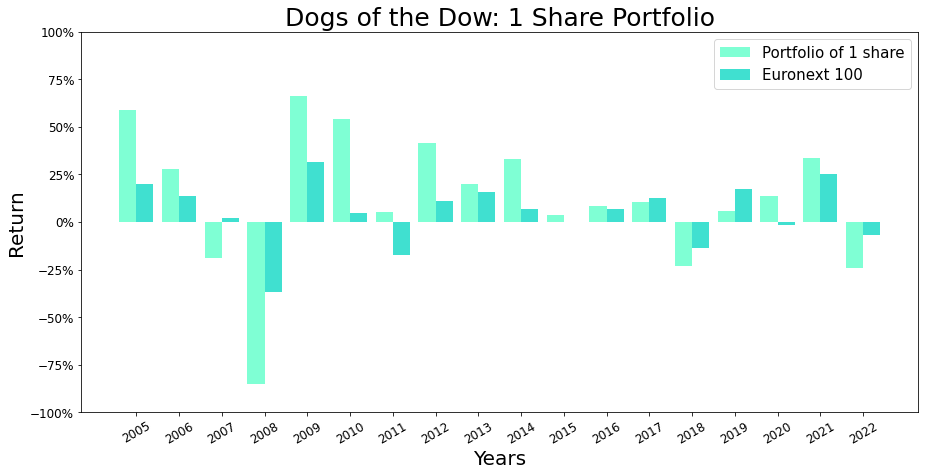

In [123]:
years = df_end.index.to_list()
p_10 = df_end['1 share'].to_list()
market = df_end['N-100'].to_list()

X_axis = np.arange(len(years))

plt.figure(figsize=(15, 7))

p_return = plt.bar(X_axis - 0.2, p_10, 0.4, label='Portfolio of 1 share', color='aquamarine')
m_return = plt.bar(X_axis + 0.2, market, 0.4, label='Euronext 100', color='turquoise')

plt.ylim([-1, 1])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().tick_params(axis='y', labelsize=12)
plt.xticks(X_axis, years, fontsize=12, rotation=30)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Return", fontsize=20)
plt.title("Dogs of the Dow: 1 Share Portfolio", fontsize=25)

plt.legend(fontsize=15)

plt.show()

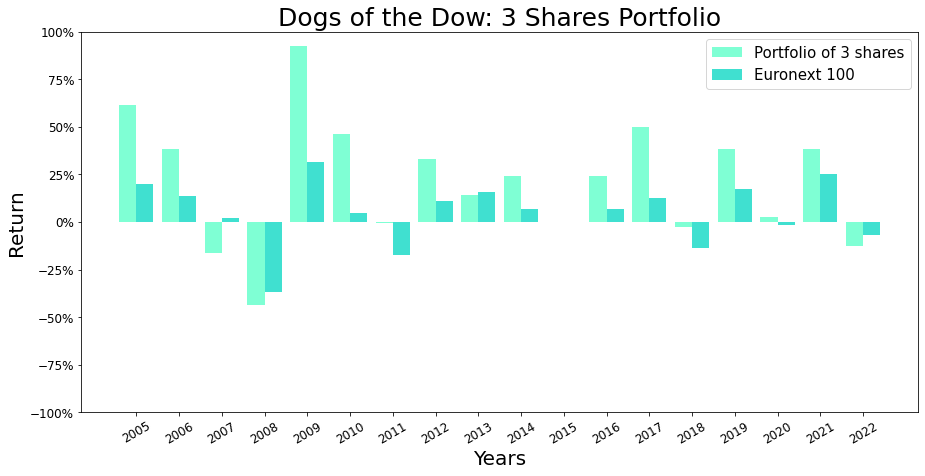

In [124]:
years = df_end.index.to_list()
p_10 = df_end['3 shares'].to_list()
market = df_end['N-100'].to_list()

X_axis = np.arange(len(years))

plt.figure(figsize=(15, 7))

p_return = plt.bar(X_axis - 0.2, p_10, 0.4, label='Portfolio of 3 shares', color='aquamarine')
m_return = plt.bar(X_axis + 0.2, market, 0.4, label='Euronext 100', color='turquoise')

plt.ylim([-1, 1])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().tick_params(axis='y', labelsize=12)
plt.xticks(X_axis, years, fontsize=12, rotation=30)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Return", fontsize=20)
plt.title("Dogs of the Dow: 3 Shares Portfolio", fontsize=25)

plt.legend(fontsize=15)

plt.show()

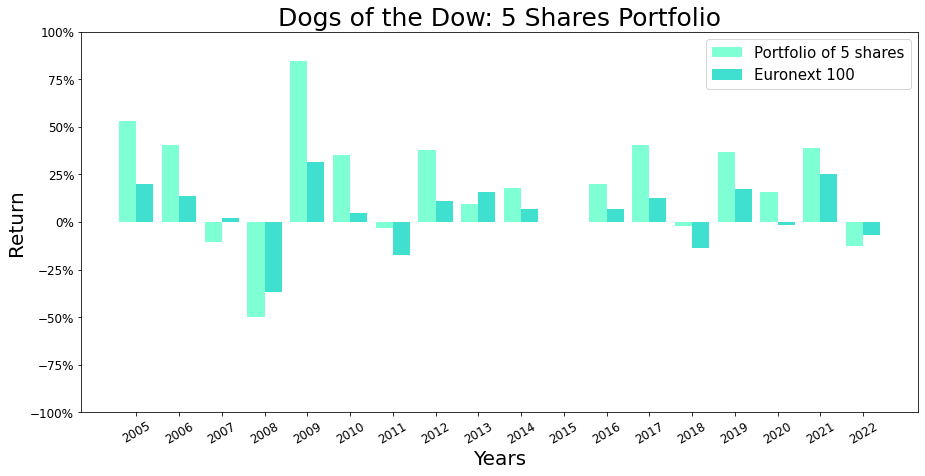

In [125]:
years = df_end.index.to_list()
p_10 = df_end['5 shares'].to_list()
market = df_end['N-100'].to_list()

X_axis = np.arange(len(years))

plt.figure(figsize=(15, 7))

p_return = plt.bar(X_axis - 0.2, p_10, 0.4, label='Portfolio of 5 shares', color='aquamarine')
m_return = plt.bar(X_axis + 0.2, market, 0.4, label='Euronext 100', color='turquoise')

plt.ylim([-1, 1])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().tick_params(axis='y', labelsize=12)
plt.xticks(X_axis, years, fontsize=12, rotation=30)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Return", fontsize=20)
plt.title("Dogs of the Dow: 5 Shares Portfolio", fontsize=25)

plt.legend(fontsize=15)

plt.show()

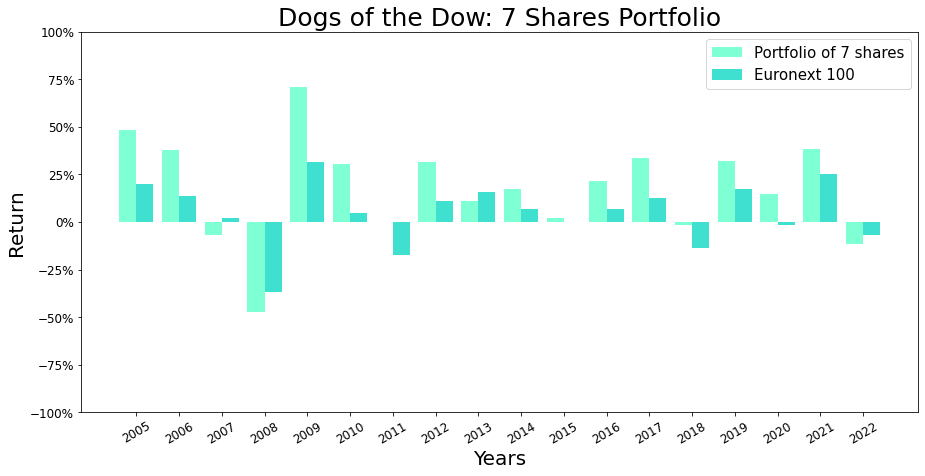

In [126]:
years = df_end.index.to_list()
p_10 = df_end['7 shares'].to_list()
market = df_end['N-100'].to_list()

X_axis = np.arange(len(years))

plt.figure(figsize=(15, 7))

p_return = plt.bar(X_axis - 0.2, p_10, 0.4, label='Portfolio of 7 shares', color='aquamarine')
m_return = plt.bar(X_axis + 0.2, market, 0.4, label='Euronext 100', color='turquoise')

plt.ylim([-1, 1])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().tick_params(axis='y', labelsize=12)
plt.xticks(X_axis, years, fontsize=12, rotation=30)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Return", fontsize=20)
plt.title("Dogs of the Dow: 7 Shares Portfolio", fontsize=25)

plt.legend(fontsize=15)

plt.show()

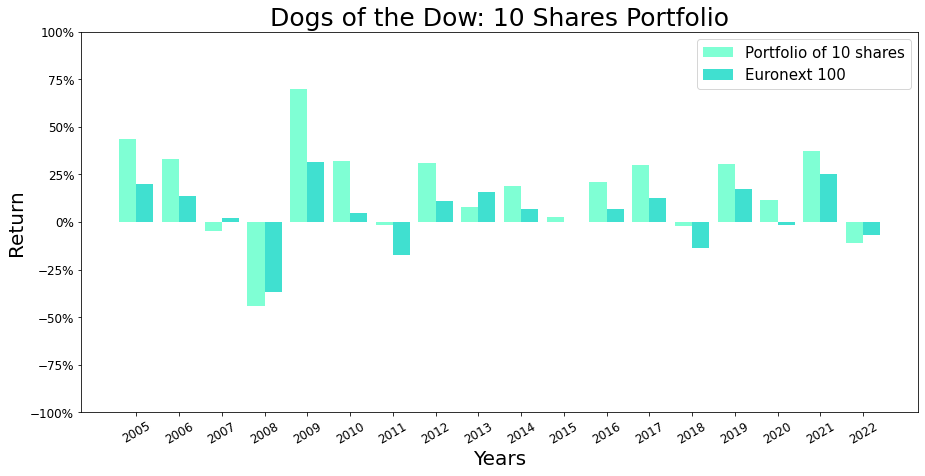

In [127]:
years = df_end.index.to_list()
p_10 = df_end['10 shares'].to_list()
market = df_end['N-100'].to_list()

X_axis = np.arange(len(years))

plt.figure(figsize=(15, 7))

p_return = plt.bar(X_axis - 0.2, p_10, 0.4, label='Portfolio of 10 shares', color='aquamarine')
m_return = plt.bar(X_axis + 0.2, market, 0.4, label='Euronext 100', color='turquoise')

plt.ylim([-1, 1])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().tick_params(axis='y', labelsize=12)
plt.xticks(X_axis, years, fontsize=12, rotation=30)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Return", fontsize=20)
plt.title("Dogs of the Dow: 10 Shares Portfolio", fontsize=25)

plt.legend(fontsize=15)

plt.show()

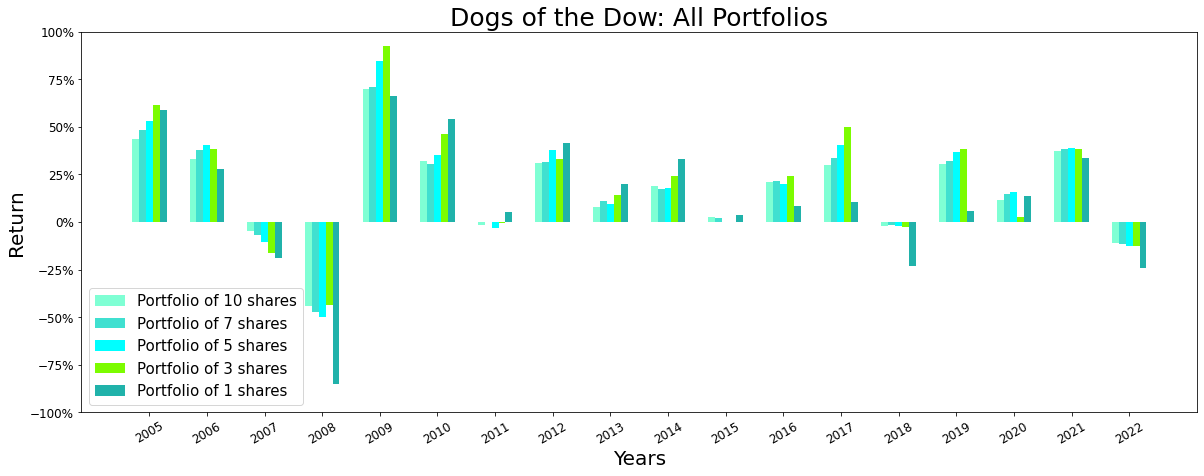

In [128]:
df = pd.read_excel('growth.xlsx', sheet_name='Sheet2')
df_end = df.set_index('Year')

years = df_end.index.to_list()
p_10 = df_end['10 shares'].to_list()
p_7 = df_end['7 shares'].to_list()
p_5 = df_end['5 shares'].to_list()
p_3 = df_end['3 shares'].to_list()
p_1 = df_end['1 share'].to_list()
market = df_end['N-100'].to_list()

X_axis = np.arange(len(years))

plt.figure(figsize=(20, 7))

p__10_return = plt.bar(X_axis - 0.24, p_10, 0.12, label='Portfolio of 10 shares', color='aquamarine')
p__7_return = plt.bar(X_axis - 0.12, p_7, 0.12, label='Portfolio of 7 shares', color='turquoise')
p__5_return = plt.bar(X_axis, p_5, 0.12, label='Portfolio of 5 shares', color='aqua')
p__3_return = plt.bar(X_axis + 0.12, p_3, 0.12, label='Portfolio of 3 shares', color='lawngreen')
p__1_return = plt.bar(X_axis + 0.24, p_1, 0.12, label='Portfolio of 1 shares', color='lightseagreen')
#m_return = plt.bar(X_axis + 0.36, market, 0.12, label='Euronext 100', color='SlateGrey')


plt.ylim([-1, 1])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().tick_params(axis='y', labelsize=12)
plt.xticks(X_axis, years, fontsize=12, rotation=30)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Return", fontsize=20)
plt.title("Dogs of the Dow: All Portfolios", fontsize=25)

plt.legend(fontsize=15)

plt.show()

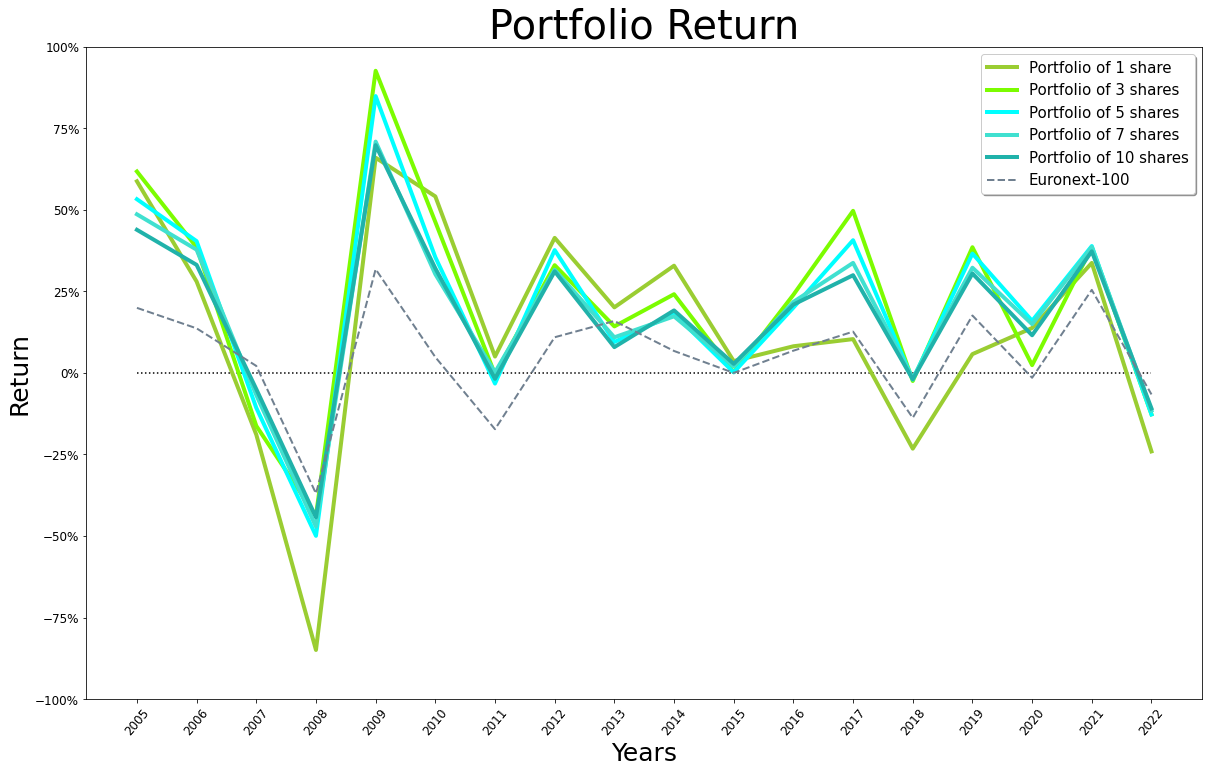

In [129]:

line = []
for i in years:
    line.append(0)

plt.figure(figsize=(20, 12))

plt.plot(years, line, linestyle='dotted', color='black')
plt.plot(years, p_1, label='Portfolio of 1 share', linewidth = 4, color='YellowGreen')
plt.plot(years, p_3, label='Portfolio of 3 shares', linewidth = 4, color='lawngreen')
plt.plot(years, p_5, label='Portfolio of 5 shares', linewidth = 4, color='aqua')
plt.plot(years, p_7, label='Portfolio of 7 shares', linewidth = 4, color='turquoise')
plt.plot(years, p_10, label='Portfolio of 10 shares', linewidth = 4, color='lightseagreen')
plt.plot(years, market, label='Euronext-100', linewidth = 2, linestyle='--', color='SlateGrey')


plt.ylim([-1, 1])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().tick_params(axis='y', labelsize=12)
plt.xticks(years, fontsize=12, rotation=50)
plt.xlabel("Years", fontsize=25)
plt.ylabel("Return", fontsize=25)
plt.title("Portfolio Return", fontsize=40)
plt.legend(fontsize=15, shadow=True)

plt.show()

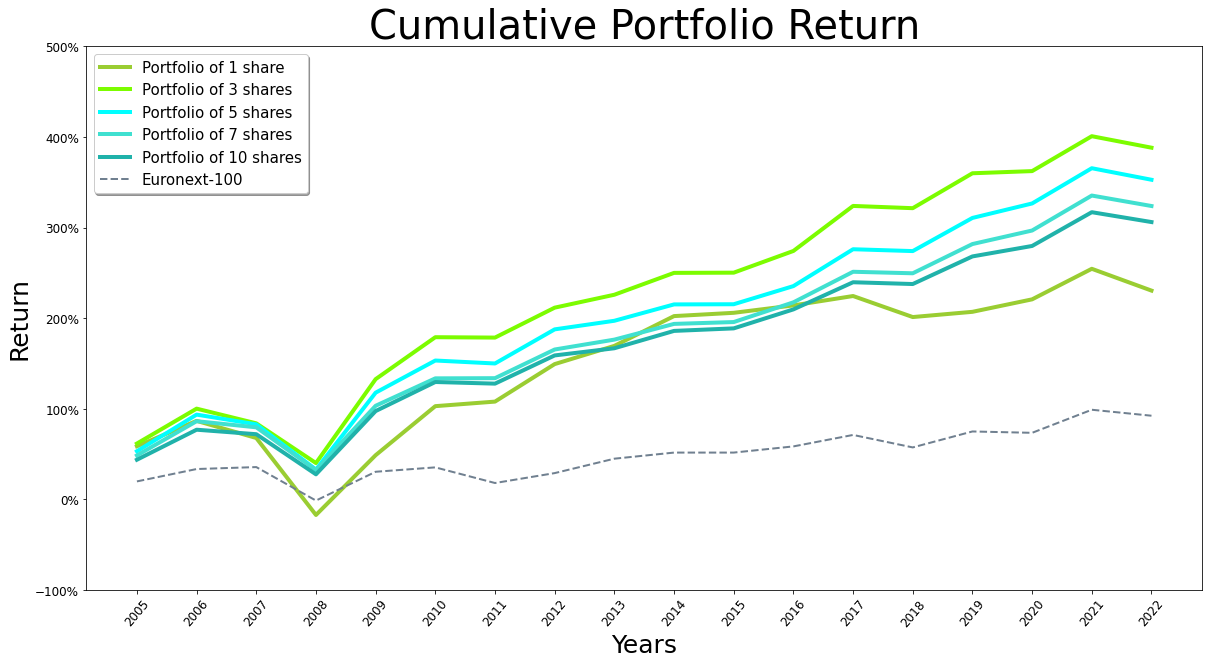

In [130]:
df = pd.read_excel('growth.xlsx', sheet_name='Sheet3')
df_end = df.set_index('Year')

years = df_end.index.to_list()
p_10 = df_end['10 shares'].to_list()
p_7 = df_end['7 shares'].to_list()
p_5 = df_end['5 shares'].to_list()
p_3 = df_end['3 shares'].to_list()
p_1 = df_end['1 share'].to_list()
market = df_end['N-100'].to_list()
perc = ['-100%', '0%', '100%', '200%', '300%', '400%', '500%']

plt.figure(figsize=(20, 10))

plt.plot(years, p_1, label='Portfolio of 1 share', linewidth = 4, color='YellowGreen')
plt.plot(years, p_3, label='Portfolio of 3 shares', linewidth = 4, color='lawngreen')
plt.plot(years, p_5, label='Portfolio of 5 shares', linewidth = 4, color='aqua')
plt.plot(years, p_7, label='Portfolio of 7 shares', linewidth = 4, color='turquoise')
plt.plot(years, p_10, label='Portfolio of 10 shares', linewidth = 4, color='lightseagreen')
plt.plot(years, market, label='Euronext-100', linewidth = 2, linestyle='--', color='SlateGrey')


plt.ylim([-1, 5])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().tick_params(axis='y', labelsize=12)
plt.xticks(years, fontsize=12, rotation=50)
plt.xlabel("Years", fontsize=25)
plt.ylabel("Return", fontsize=25)
plt.title("Cumulative Portfolio Return", fontsize=40)
plt.legend(fontsize=15, shadow=True)

plt.show()